In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

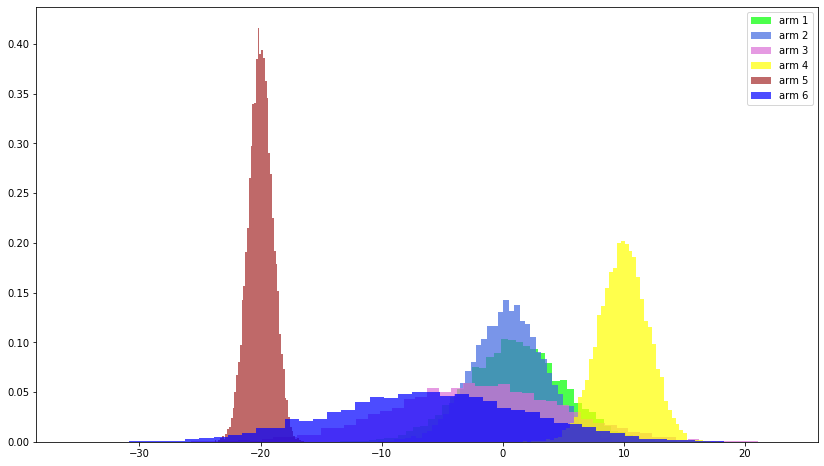

In [77]:
# Reward Distributions
arms_count = 8
mus = [1.0, 0.5, -2, 10, -20, -6,13, -8, 23]
sigmas = [4, 3.0, 7.0, 2, 1 , 8, 10, 4, 1]
colors = ['lime', 'royalblue', 'orchid','yellow','brown','blue']
sample_size = 10000
bins = 50

plt.figure(figsize=(14,8))
for mu, sigma, idx, color in zip(mus, sigmas, np.arange(arms_count), colors):
    sample = np.random.normal(mu, sigma, sample_size)
    plt.hist(sample, bins=bins, density=True, alpha=0.7, label=f'arm {idx+1}', color=color)
plt.legend()
plt.show()

In [78]:
def reward(arm):
    r= np.random.normal(mus[arm], sigmas[arm])
    return r

In [79]:
reward(0)

-3.450916670269721

In [80]:
Qs = np.ones(arms_count) *15

In [81]:
def select_arm_e_greedy(Qs, epsilon):
    
    rand = np.random.random()
    if rand < 1-epsilon:
        return np.argmax(Qs)
    
    arm = np.random.randint(arms_count)
    return arm

In [82]:
select_arm_e_greedy(Qs,0.9)

0

In [83]:
def select_arm_softmax(Qs, temperature):
    beta = 1/temperature
    partition = np.sum(np.exp(Qs*beta))
    P = np.exp(Qs*beta)/partition
    arm = np.random.choice([i for i in range(arms_count)], p=P)
    return arm

In [84]:
select_arm_softmax(Qs, 10)

5

In [85]:
alpha = 0.5
epsilon=0.9
Qs = np.array([15 for i in range(arms_count)])
arm = select_arm_e_greedy(Qs, epsilon)
R = reward(arm)
Qs[arm] = Qs[arm] + alpha*(R-Qs[arm])
Qs

array([15, 15, 15, 15, 15, 15, 15,  0])

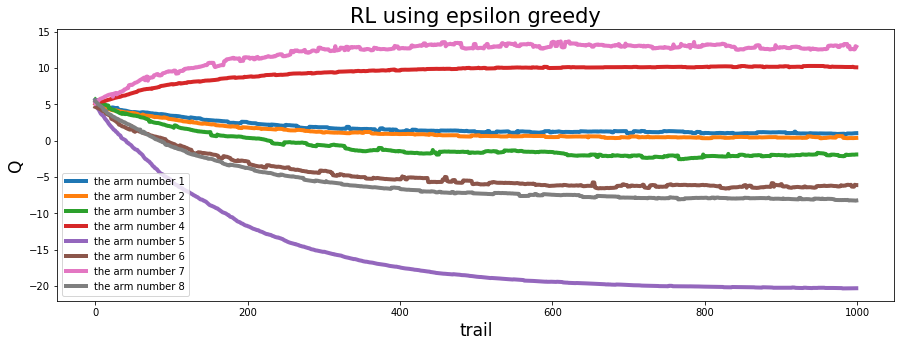

In [86]:
plt.figure(figsize=(15,5))
Qs_list = []
Qs = np.random.random(arms_count)*10
Qs_list.append(Qs*1)
elpsilon = 0.5
action_n = [0 for i in range(arms_count)]
for t in range(1,1000):
    arm = select_arm_e_greedy(Qs, epsilon)
    R = reward(arm)
    action_n[arm]=+1
    Qs[arm] = Qs[arm] + 1/action_n[arm]*(R-Qs[arm])
    Qs_list.append(Qs*1)
Qs_data = np.array(Qs_list*1)
ens = 50
for E in range(ens):
    Qs_list = []
    Qs = np.random.random(arms_count)*10
    Qs_list.append(Qs*1)
    action_arm =[0,0,0]
    for t in range(1,1000):
        arm = select_arm_e_greedy(Qs, epsilon)
        R = reward(arm)
        action_n[arm]=+1
        Qs[arm] = Qs[arm] + 0.05/action_n[arm]*(R-Qs[arm])
        Qs_list.append(Qs*1)
    Qs_data += np.array(Qs_list*1)

for i in range(arms_count):
    plt.plot(Qs_data[:,i]/ens,label = 'the arm number {}'.format(i+1),linewidth=4)


plt.title('RL using epsilon greedy',size=21)
plt.xlabel('trail',size=17)
plt.ylabel('Q',size=17)
plt.legend()